In [40]:
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import unidecode
import re

In [41]:
df_train = pd.read_csv('./Datathon/properties_colombia/properties_colombia_train.csv')
df_test = pd.read_csv('./Datathon/properties_colombia/properties_colombia_test.csv')

In [42]:
#Let's see what features we have
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65850 entries, 0 to 65849
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       65850 non-null  int64  
 1   id               65850 non-null  object 
 2   ad_type          65850 non-null  object 
 3   start_date       65850 non-null  object 
 4   end_date         65850 non-null  object 
 5   created_on       65850 non-null  object 
 6   lat              49433 non-null  float64
 7   lon              49433 non-null  float64
 8   l1               65850 non-null  object 
 9   l2               65850 non-null  object 
 10  l3               62193 non-null  object 
 11  l4               15074 non-null  object 
 12  l5               9052 non-null   object 
 13  l6               2364 non-null   object 
 14  rooms            9110 non-null   float64
 15  bedrooms         13403 non-null  float64
 16  bathrooms        52054 non-null  float64
 17  surface_tota

In [43]:
# 'Unnamed: 0': Drop it as it doesn't mean anything 
df_train.drop('Unnamed: 0', axis=1,inplace=True)

In [44]:
# 'id': The Id of a property has no correlation to the property price, we can just delete it
df_train.drop('id',axis=1,inplace=True)

In [45]:
# 'ad_type': As it only has 1 unique value, it doesn't contribute to the target feature in any way so we can get rid of it
print(df_train['ad_type'].unique())
df_train.drop('ad_type',axis=1,inplace=True)

['Propiedad']


In [46]:
# 'start_date': Leave it, as inflation month by month surely has an effect on the price of a property
df_train['start_date'] = pd.to_datetime(df_train['start_date'])

In [47]:
# 'end_date': Has no use on it's own, the only kind of analysis we can get out of this column is how much time the ad has been online, but it doesn't really have a correlation with it's price,
#only in outlier cases where the ad was put up in the same day it was put down(by a mistake) and that doesn't really happen that often to have to keep it
df_train.end_date.value_counts()
df_train.drop('end_date',axis=1, inplace=True)

In [48]:
# 'created_on": Knowing the day where the ad was created is not really useful to knowing it's price, it's last update gives us a more real value of the property in the present
df_train[df_train['start_date'] == df_train['created_on']].shape
df_train.drop('created_on',axis=1,inplace=True)

    Latitude and Longitude ------------------------------------------------------------------------------------------

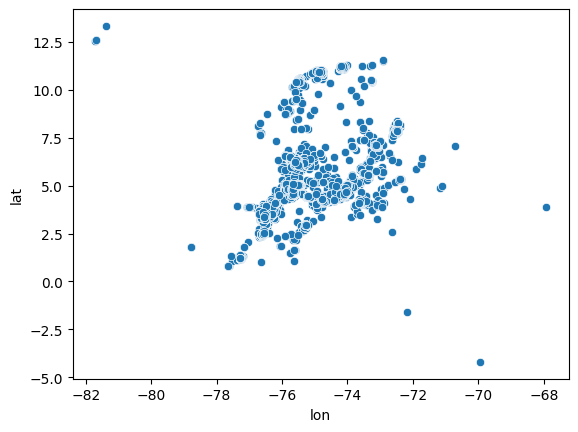

In [49]:
sns.scatterplot(x= df_train.lon, y= df_train.lat)
# We can see in the scatterplot that there are 2 outliers in our data, so let's research them
# here you can see the bottom outlier: df_train[df_train.lat == df_train.lat.min()]
# here you can see the top outlier: df_train[df_train.lat == df_train.lat.max()]
# If we insert this coordinates into a tool to find the location on the world map, we get a location in Chile and USA, 
#so it's useless in our research and we can drop it
df_train.drop(df_train.loc[df_train['lat'] == df_train.lat.min()].index,inplace=True)
df_train.drop(df_train.loc[df_train['lat'] == df_train.lat.max()].index,inplace=True)

In [50]:
# 'lat': In latitude we can use 'L2'(state) as a reference to fill up the null values 
print('Null values:',df_train.lat.isna().sum())
dict_lat = {
    'Antioquia': 7.154030,
    'Atlántico': 10.987760,
    'Cundinamarca': 4.781800,
    'Meta': 3.2720,
    'Valle del Cauca': 3.858560,
    'Caldas': 6.090000,
    'Risaralda': 4.606880,
    'Magdalena': 10.249170,
    'Santander': -0.622170,
    'Cauca': 8.252500,
    'Huila': 3.376450,
    'Bolívar': 1.833650,
    'Tolima': 4.034880,
    'Norte de Santander': 8.084580,
    'Quindío': 4.396070,
    'Caquetá': 1.113340,
    'Sucre': 8.811250,
    'Guainía': 2.719020,
    'La Guajira': 11.427780,
    'Boyacá': 5.453740,
    'Cesar': 10.769930, 
    'Amazonas': -2.056290,
    'San Andrés Providencia y Santa Catalina': 12.542720,
    'Casanare': 5.296580,
    'Vichada': 4.712170,
    'Córdoba': 9.586680,
    'Chocó': 6.320330
}

df_train['lat'] = df_train.lat.fillna(df_train.l2.map(dict_lat))
print('Null values:',df_train.lat.isna().sum())

Null values: 16417
Null values: 0


In [51]:
# 'lon': In longitude we can use 'L2'(state) as a reference to fill up the null values 
print('Null values:',df_train.lon.isna().sum())
dict_lon = {
    'Antioquia': -75.503349,
    'Atlántico': -74.954620,
    'Cundinamarca': -73.970757,
    'Meta': -73.0877,
    'Valle del Cauca': -76.519810,
    'Caldas': -75.636627,
    'Risaralda': -74.071840,
    'Magdalena': -74.261080,
    'Santander': -72.382812,
    'Cauca': -74.722893,
    'Huila': -74.802391,
    'Bolívar': -76.967293,
    'Tolima': -75.255890,
    'Norte de Santander': -72.842781,
    'Quindío': -75.640083,
    'Caquetá': -73.813004,
    'Sucre': -74.721390,
    'Guainía': -67.566940, 
    'La Guajira': -72.388634,
    'Boyacá': -73.362480,
    'Cesar': -73.004791, 
    'Amazonas': -71.892921,
    'San Andrés Providencia y Santa Catalina': -81.717900,
    'Casanare': -71.456268,
    'Vichada': -69.414350,
    'Córdoba': -74.826302,
    'Chocó': -76.944901
}

df_train['lon'] = df_train.lon.fillna(df_train.l2.map(dict_lon))
print('Null values:',df_train.lon.isna().sum())

Null values: 16417
Null values: 0


<AxesSubplot: xlabel='lon', ylabel='lat'>

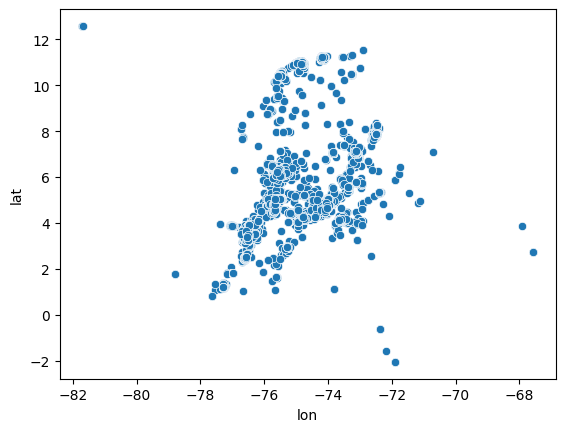

In [52]:
# Now the scatterplot is in a much closer range and not outliers are seen
sns.scatterplot(x= df_train.lon, y= df_train.lat)

    ------------------------------------------------------------------------------------------------------------------

In [53]:
# 'l1': Having information on what country we're situated in is useless as this dataset is situated in Colombia already
print(df_train.l1.unique())
df_train.drop('l1',axis=1,inplace=True)

['Colombia']


In [54]:
# 'l2': Here I check that it has all the states in Colombia.
Departamentos_colombianos = ['Amazonas','Antioquia','Arauca','Atlántico','Bolívar','Boyacá','Caldas','Caquetá',
'Casanare','Cauca','Cesar','Chocó','Córdoba','Cundinamarca','Guainía','Guaviare','Huila','La Guajira','Magdalena',
'Meta','Nariño','Norte de Santander','Putumayo','Quindí','Risarald','San Andrés y Providencia','Santander','Sucre','Tolima',
'Valle del Cauca','Vaupé','Vichada']

result = any(e in list(df_train.l2.unique()) for e in Departamentos_colombianos )

result 

True

In [55]:
# 'l3': Here there really isn't a way to check if all these cities are Colombian as we're going into way less defined territory
#so what I do is just look at all the unique values by eye as it's not big enough yet, to see if there is a wrongly inputted outlier
print('Nulls:',df_train[df_train.l3.isna()].shape[0])
df_train.l3.unique()


Nulls: 3656


array(['Bogotá D.C', 'Envigado', 'Medellín', 'Cali', 'Manizales', 'Funza',
       'Popayán', 'Leticia', 'Cúcuta', 'Dagua', 'Barranquilla',
       'Bucaramanga', 'Cartagena', 'Pereira', nan, 'Floridablanca',
       'Ibagué', 'Arbeláez', 'Jamundí', 'Cartago', 'Bello', 'Chía',
       'Florencia', 'Armenia', 'Marinilla', 'Rionegro', 'Barbosa',
       'Cajicá', 'La Ceja', 'Palmira', 'Villamaría', 'Piedecuesta',
       'Sabaneta', 'Villavicencio', 'Girardot', 'Chaparral', 'Anapoima',
       'Itagui', 'Marsella', 'Soacha', 'Silvania', 'Tabio', 'Garzón',
       'Barrancabermeja', 'Puerto Boyacá', 'Tocancipá', 'Guarne',
       'Juan de Acosta', 'Sopó', 'Villa del Rosario', 'Santa Marta',
       'Madrid', 'Ipiales', 'Villa de Leyva', 'Tubará', 'Girón',
       'Fúquene', 'Palestina', 'Girardota', 'Abejorral', 'Melgar',
       'Neiva', 'Guaduas', 'Tuluá', 'La Estrella', 'Zipaquirá', 'Tunja',
       'Tibacuy', 'Los Patios', 'Purificación', 'Riofrío', 'Fusagasugá',
       'Quimbaya', 'Santa Rosa de 

In [56]:
# 'l4': The amount of neighbourhoods is not enough to fill up even 50% of our data, drop it as getting that kinf of information from geolocation is difficult
print('Unique values:', df_train.l4.nunique())
df_train.drop('l4', axis=1, inplace=True)

Unique values: 55


In [57]:
# 'l5': same as 'l4'
print('Nulls:',df_train[df_train.l5.isna()].shape[0])
print('Unique values:', df_train.l5.nunique())
df_train.drop('l5', axis=1, inplace=True)

Nulls: 56796
Unique values: 19


In [58]:
# 'l6': same as 'l4'
print('Nulls:',df_train[df_train.l6.isna()].shape[0])
print('Unique values:', df_train.l6.nunique())
df_train.drop('l6', axis=1, inplace=True)

Nulls: 63484
Unique values: 121


    Property Rooms ---------------------------------------------------------------------------------------------------

Here the problem is that we have way too many nulls, and the real value is sometimes in the description, we can use RegularExpresion(regex) to get that kind of information out, but it's not really consistent

In [59]:
# 'rooms': there are way too many nulls to make this column useful, it's a shame because the amount of rooms in a property is really important
print('Nulls:',df_train[df_train.rooms.isna()].shape[0])
df_train.drop('rooms', axis=1, inplace=True)

Nulls: 56739


In [60]:
# 'bedrooms': same as 'rooms'
print('Nulls:',df_train[df_train.bedrooms.isna()].shape[0])
df_train.drop('bedrooms', axis=1, inplace=True)

Nulls: 52446


In [61]:
# 'bathrooms': we have 20% of nulls, just on the edge of the minimum amount of nulls needed to drop the column, we'll see in the model training if this column makes sense to keep it
print('Nulls:',df_train[df_train.bathrooms.isna()].shape[0])
a = df_train[df_train.bathrooms.isna()].shape[0] / df_train.bathrooms.shape[0]
a

Nulls: 13794


0.20948244441744623

    ------------------------------------------------------------------------------------------------------------------

In [62]:
# 'surface_total': wayy too many nulls
print('Nulls:',df_train[df_train.surface_total.isna()].shape[0])
df_train.drop('surface_total',axis=1,inplace=True)

Nulls: 63534


In [63]:
# 'surface_covered': same as surface_total
print('Nulls:',df_train[df_train.surface_covered.isna()].shape[0])
df_train.drop('surface_covered',axis=1,inplace=True)

Nulls: 62543


    Price,Currency -------------------------------------------------------------------------------------------------------------------------

In [64]:
# 'price': Because the objective of the model is to classify properties into cheap and expensive, we can use price to create that target feature 
print('Nulls:',df_train[df_train.price.isna()].shape[0]) #Here we can drop these null rows as they are not really that many
df_train = df_train[df_train['price'].notnull()]

sns.boxplot(df_train.price)

AttributeError: 'DataFrame' object has no attribute 'price'

In [ ]:
# 'currency': Here we have only 8 rows with usd as currency, we can easily drop it as knowing the COP value in that year is too much work for so little value, then we can drop the nulls 
#as they are not even .5% of our total database
print('Nulls:',df_train[df_train.currency.isna()].shape[0])
#USD
print(df_train.currency.value_counts())
df_train.drop(df_train.loc[df_train['currency'] == 'USD'].index,inplace=True)
#NULL
df_train = df_train[df_train['currency'].notnull()]
#Now we can just drop it as every value is exactly the same
df_train.drop('currency',axis=1,inplace=True)

Nulls: 4
COP    197472
USD         8
Name: currency, dtype: int64


In [ ]:
# 'price_period' has way too many nulls and no way to recover them
print('Nulls:',df_train[df_train.price_period.isnull()].shape[0])
df_train.drop('price_period',axis=1,inplace=True)

Nulls: 161507


    -------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# 'title': We shouldn't care about the title as it's a summary of description 
df_train.drop('title',axis=1,inplace=True)

In [ ]:
# 'description': Description has a ton of information on every property, but it's not consistent enough so that we can pull out concrete information from it without being super specific.
#so I thinks it's much more time sensitive to leave out this columns for the model
df_train.drop('description',axis=1,inplace=True)


    Regex training for later versions-------------------------------------------------------

In [ ]:
#df_train.description = df_train.description.apply(str)
#df_train.description = df_train.description.str.lower()
#df_train.description = df_train.description.apply(unidecode.unidecode)
#df_train.description = df_train.description.

In [ ]:
# a = 1
# pattern = '([a-z]*|\d*) habitaciones'
# match = re.findall(pattern, df_train.description[a]) 
# print('match:', match, 'found in column:',df_train.bedrooms[a])
# df_train.description[a]

In [ ]:
# a = 7
# pattern = 'area [^\d]*(\d*)'
# match = re.findall(pattern, df_train.description[a]) 
# print('match:', match, 'found in column covered:',df_train.surface_covered[a],' total:',df_train.surface_total[a])
# df_train.description[a]

In [ ]:
# a = 6
# pattern = '([a-z]*|\d*) banos'
# match = re.findall(pattern, df_train.description[a]) 
# print('match:', match, 'found in column:',df_train.bathrooms[a])
# df_train.description[a]

    -----------------------------------------------------------------------------------------------

In [ ]:
# 'property_type': no nulls, and it's vital information, we can make dummy variables from them later
print('Nulls:',df_train[df_train.property_type.isnull()].shape[0])
df_train.property_type.unique() 

Nulls: 0


array(['Casa', 'Apartamento', 'Otro', 'Oficina', 'Finca', 'Lote',
       'Local comercial', 'Parqueadero'], dtype=object)

In [ ]:
# 'operation_type': here we have no nulls, but every value is the same, so this column is useless
print('Nulls:',df_train[df_train.operation_type.isnull()].shape[0])
df_train.operation_type.unique()
df_train.drop('operation_type',axis=1,inplace=True)


Nulls: 0


In [ ]:
# 'geometry': here this column is the exact same as 'lat'+'lon', so there really is not reason to keep it for the predictions
df_train.drop('geometry',axis=1,inplace=True)

In [ ]:
# Now we save the csv into a folder that we can access later in Model.ipynb
df_train.to_csv('./Datasets_for_model/properties_colombia_train.csv',index=False)

    df_test --------------------------------------------------------------------------------------

In [74]:
df_test.drop('Unnamed: 0', axis=1,inplace=True)
df_test.drop('id',axis=1,inplace=True)
df_test.drop('ad_type',axis=1,inplace=True)
df_test['start_date'] = pd.to_datetime(df_test['start_date'])
df_test.drop('end_date',axis=1, inplace=True)
df_test.drop('created_on',axis=1,inplace=True)
df_test.drop('l1',axis=1,inplace=True)
df_test.drop('l4',axis=1,inplace=True)
df_test.drop('l5',axis=1,inplace=True)
df_test.drop('l6',axis=1,inplace=True)
df_test.drop('rooms', axis=1, inplace=True)
df_test.drop('bedrooms', axis=1, inplace=True)
df_test.drop('surface_total',axis=1,inplace=True)
df_test.drop('surface_covered',axis=1,inplace=True)
df_test.drop('currency',axis=1,inplace=True)
df_test.drop('title',axis=1,inplace=True)
df_test.drop('description',axis=1,inplace=True)
df_test.drop('operation_type',axis=1,inplace=True)
df_test.drop('geometry',axis=1,inplace=True)


dict_lat = {
    'Antioquia': 7.154030,
    'Atlántico': 10.987760,
    'Cundinamarca': 4.781800,
    'Meta': 3.2720,
    'Valle del Cauca': 3.858560,
    'Caldas': 6.090000,
    'Risaralda': 4.606880,
    'Magdalena': 10.249170,
    'Santander': -0.622170,
    'Cauca': 8.252500,
    'Huila': 3.376450,
    'Bolívar': 1.833650,
    'Tolima': 4.034880,
    'Norte de Santander': 8.084580,
    'Quindío': 4.396070,
    'Caquetá': 1.113340,
    'Sucre': 8.811250,
    'Guainía': 2.719020,
    'La Guajira': 11.427780,
    'Boyacá': 5.453740,
    'Cesar': 10.769930, 
    'Amazonas': -2.056290,
    'San Andrés Providencia y Santa Catalina': 12.542720,
    'Casanare': 5.296580,
    'Vichada': 4.712170,
    'Córdoba': 9.586680,
    'Chocó': 6.320330
}

df_test['lat'] = df_test.lat.fillna(df_test.l2.map(dict_lat))

dict_lon = {
    'Antioquia': -75.503349,
    'Atlántico': -74.954620,
    'Cundinamarca': -73.970757,
    'Meta': -73.0877,
    'Valle del Cauca': -76.519810,
    'Caldas': -75.636627,
    'Risaralda': -74.071840,
    'Magdalena': -74.261080,
    'Santander': -72.382812,
    'Cauca': -74.722893,
    'Huila': -74.802391,
    'Bolívar': -76.967293,
    'Tolima': -75.255890,
    'Norte de Santander': -72.842781,
    'Quindío': -75.640083,
    'Caquetá': -73.813004,
    'Sucre': -74.721390,
    'Guainía': -67.566940, 
    'La Guajira': -72.388634,
    'Boyacá': -73.362480,
    'Cesar': -73.004791, 
    'Amazonas': -71.892921,
    'San Andrés Providencia y Santa Catalina': -81.717900,
    'Casanare': -71.456268,
    'Vichada': -69.414350,
    'Córdoba': -74.826302,
    'Chocó': -76.944901
}

df_test['lon'] = df_test.lon.fillna(df_test.l2.map(dict_lon))

In [75]:
df_test.to_csv('./Datasets_for_model/properties_colombia_test.csv',index=False)